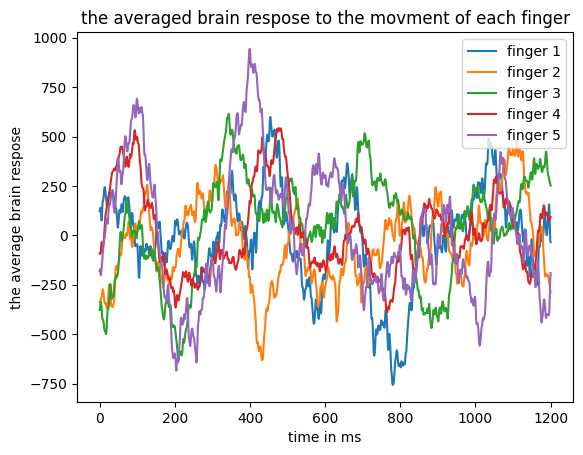

[[ 121.53125     128.1328125   139.8984375  ...   42.5078125
   -24.203125    -34.8125    ]
 [-338.15       -338.00833333 -334.30833333 ... -263.4
  -278.4        -289.89166667]
 [-377.60833333 -368.6        -346.49166667 ...  265.61666667
   258.34166667  251.45      ]
 [ -92.30526316  -89.95263158  -92.02631579 ...   80.86315789
    87.13157895   93.43684211]
 [-180.85135135 -171.39189189 -185.64864865 ... -294.22972973
  -222.95945946 -191.36486486]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def calc_mean_erp(trial_points, ecog_data):
    #loading the relevent data and nameing the columns by the relevent name
    trial_data_df = pd.read_csv(trial_points, header=None, names=["start", "peak", "finger"])
    #making sure the data in each column is an int type
    trial_data_df = trial_data_df.astype({"start": "int", "peak": "int", "finger": "int"})
    #loading the relevant data and making sure the function knows there is no header and the first row is also data
    ecog_data_df = pd.read_csv(ecog_data, header=None)
    #taking the signal as a numpuy array
    ecog_signal = ecog_data_df.iloc[:,0].values 

    #setting up a matrix that is 5x1201
    fingers_erp_mean = np.zeros((5,1201))

    #setting a loop that would take the data to the corresponding finger 
    for finger in range(1,6):
        finger_trials = trial_data_df[trial_data_df["finger"] == finger]

        #setting an empty list that would store the segments for the specific finger
        finger_segments = []

        #extracting segments for each trial
        for _, row in finger_trials.iterrows():
           #starting 200 ms before the moving of the finger
           start = row["start"] - 200 
           if 0 <= start and start +1201 <= len (ecog_signal):
               segment = ecog_signal[start : start + 1201]
               finger_segments.append(segment) #adding the segment to the list

        #calculate the mean ERP for the finger thats in the loop (if there is a trial) 
        if finger_segments:
            finger_segments = np.array(finger_segments)
            fingers_erp_mean[finger-1,:] = np.mean(finger_segments, axis = 0)

    #ploting the fingers on a graph     
    for finger in range (1,6):
        plt.plot(fingers_erp_mean[finger-1,:], label =f"finger {finger}")

    plt.xlabel('time in ms')
    plt.ylabel('the average brain respose')
    plt.title('the averaged brain respose to the movment of each finger')
    plt.legend()
    plt.show()
    print(fingers_erp_mean)
    return fingers_erp_mean
#calling the function with the right files as the variables 
fingers_erp_mean = calc_mean_erp(
    "C:/Users/97258/Desktop/2year-targil/events_file_ordered.csv",
    "C:/Users/97258/Desktop/2year-targil/brain_data_channel_one.csv" )



